In [1]:
import os
import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
(train_x, train_y) , (test_x, test_y) = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


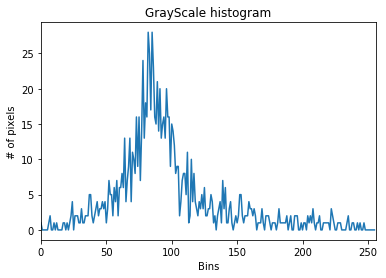

In [3]:
img = train_x[0]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0,256])
plt.figure(figsize = (6,4))
plt.title("GrayScale histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()

In [4]:
print(f" hist shape : {hist.shape}, \n two values in histogram : {hist[:2]}")

 hist shape : (256, 1), 
 two values in histogram : [[1.]
 [0.]]


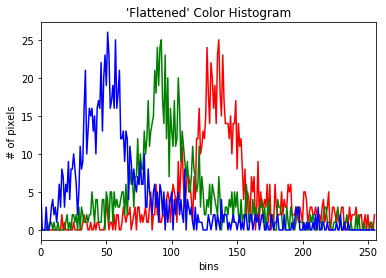

In [5]:
channels = cv2.split(img)
colors = ("r","g","b")

plt.figure(figsize=(6,4))
plt.title("'Flattened' Color Histogram")
plt.xlabel("bins")
plt.ylabel("# of pixels")

for (chan, color) in zip(channels, colors):
  hist = cv2.calcHist(chan.reshape(1,chan.shape[0],chan.shape[1]),[0],None,[256],[0,256])
  plt.plot(hist, color = color)
  plt.xlim([0,256])

plt.show()

# 作業
畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

pixels between [16,32] : [4.]
pixels between [16,32] : [17.]
pixels between [16,32] : [108.]


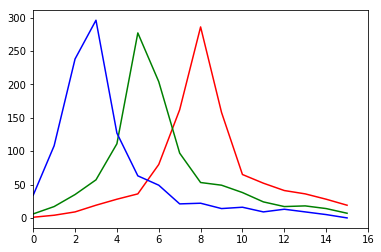

In [6]:
for (chan,color) in zip(channels, colors):
  hist = cv2.calcHist(chan.reshape(1,chan.shape[0],chan.shape[1]), [0], None, [16], [0,256])
  print(f"pixels between [16,32] : {hist[1]}")
  plt.plot(hist, color = color)
  plt.xlim([0,16])

plt.show()